<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-исследовательский-анализ-данных-(Exploratory-data-analysis)" data-toc-modified-id="Загрузка-и-исследовательский-анализ-данных-(Exploratory-data-analysis)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и исследовательский анализ данных (Exploratory data analysis)</a></span><ul class="toc-item"><li><span><a href="#covers_data" data-toc-modified-id="covers_data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>covers_data</a></span></li><li><span><a href="#lyrics_data" data-toc-modified-id="lyrics_data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>lyrics_data</a></span></li><li><span><a href="#meta_data" data-toc-modified-id="meta_data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>meta_data</a></span></li></ul></li><li><span><a href="#Предобработка-данных-(Data-preprocessing)" data-toc-modified-id="Предобработка-данных-(Data-preprocessing)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных (Data preprocessing)</a></span><ul class="toc-item"><li><span><a href="#covers_data-preprocessing" data-toc-modified-id="covers_data-preprocessing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>covers_data preprocessing</a></span></li><li><span><a href="#lyrics_data-preprocessing" data-toc-modified-id="lyrics_data-preprocessing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>lyrics_data preprocessing</a></span></li><li><span><a href="#meta_data-preprocessing" data-toc-modified-id="meta_data-preprocessing-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>meta_data preprocessing</a></span></li><li><span><a href="#Объединение-данных-в-одну-талицу-(Data-merging)" data-toc-modified-id="Объединение-данных-в-одну-талицу-(Data-merging)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Объединение данных в одну талицу (Data merging)</a></span></li><li><span><a href="#Преобразование-и-отбор-признаков-для-построения-бэйзлайн-модели" data-toc-modified-id="Преобразование-и-отбор-признаков-для-построения-бэйзлайн-модели-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Преобразование и отбор признаков для построения бэйзлайн модели</a></span></li><li><span><a href="#Деление-данных-на-выборки,-выделение-признаков-и-целевого-признака-(Data-splitting,-features/target-splitting)" data-toc-modified-id="Деление-данных-на-выборки,-выделение-признаков-и-целевого-признака-(Data-splitting,-features/target-splitting)-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Деление данных на выборки, выделение признаков и целевого признака (Data splitting, features/target splitting)</a></span></li><li><span><a href="#Векторизация-столбца-text" data-toc-modified-id="Векторизация-столбца-text-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Векторизация столбца text</a></span></li><li><span><a href="#Обучение-модели-градиентного-бустинга-LGBMClassifier()" data-toc-modified-id="Обучение-модели-градиентного-бустинга-LGBMClassifier()-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Обучение модели градиентного бустинга LGBMClassifier()</a></span></li></ul></li></ul></div>

<div style='border:solid green 5px; padding: 40px'>

# <font color='darkgreen'>**Проект по разработке ML-модели для сопоставления текстов музыкальных произведений и для поиска каверов по их текстам для Яндекс Музыка**</font>
    
</div>

_**Цель проекта: для компании Яндекс Музыка разработать ML-модель для сопоставления текстов музыкальных произведений и для поиска каверов (вариации обработки оригинала с элементами новой аранжировки) по их текстам.**_

Обнаружение треков каверов - важная продуктовая задача, которая может значительно улучшить качество рекомендаций музыкального сервиса и повысить счастье пользователей. Если сервис может с высокой точностью классифицировать каверы и связывать их между собой, то можно предложить пользователю новые возможности для управления потоком треков. Например: по желанию пользователя можно полностью исключить каверы из рекомендаций; показать все каверы на любимый трек пользователя; контролировать долю каверов в ленте пользователя.

В ходе проекта нужно разработать решение, которое:
 - может классифицировать треки по признаку кавер-некавер;
 - связывать (группировать) каверы и исходный трек;
 - находить исходный трек в цепочке каверов.

В идеале решение должно выполнять все три функции. Но для заказчика интересны также решения хотя бы одной из задач.

## Загрузка и исследовательский анализ данных (Exploratory data analysis)

In [1]:
#!pip install -U sentence-transformers

In [2]:
# импорты из стандартной библиотеки
import warnings

# импорты сторонних библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

# импорты модулей текущего проекта
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, fbeta_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.spatial.distance import cityblock
from optuna.integration import OptunaSearchCV
from sentence_transformers import SentenceTransformer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')
eng_stopwords = set(nltk_stopwords.words('english'))


# настройки
warnings.filterwarnings("ignore")

random_state = 12345

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\efimo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# прочитаем датафреймы

covers_data = pd.read_json('covers.json', lines = True)
lyrics_data = pd.read_json('lyrics.json', lines = True)
meta_data = pd.read_json('meta.json', lines = True)

In [4]:
# посмотрим на первые строки датафреймов и некоторые статистические данные

data = {'covers_data': covers_data, 'lyrics_data': lyrics_data, 'meta_data': meta_data}

for name, dataframe in data.items():
    print('Название датафрейма:', name)
    display(dataframe.head(5))
    display(dataframe.describe(include = "all"))
    display(dataframe.info())
    print('-'*75)

Название датафрейма: covers_data


,original_track_id,track_id,track_remake_type
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL
2,cd89fef7ffdd490db800357f47722b20,cd89fef7ffdd490db800357f47722b20,ORIGINAL
3,995665640dc319973d3173a74a03860c,995665640dc319973d3173a74a03860c,ORIGINAL
4,None,d6288499d0083cc34e60a077b7c4b3e1,COVER


,original_track_id,track_id,track_remake_type
count,4821,71597,71597
unique,4468,71597,2
top,f3e5e9db509f9b6f6d93b9c38e4e1324,eeb69a3cb92300456b6a5f4162093851,COVER
freq,38,1,67304


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71597 entries, 0 to 71596
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_track_id  4821 non-null   object
 1   track_id           71597 non-null  object
 2   track_remake_type  71597 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


None

---------------------------------------------------------------------------
Название датафрейма: lyrics_data


,lyricId,text,track_id
0,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",1c4b1230f937e4c548ff732523214dcd
1,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,0faea89b0d7d6235b5b74def72511bd8
2,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,9c6dc41d5ccd9968d07f055da5d8f741
3,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,bfd04a73e9cffdf0e282c92219a86ea1
4,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",8d70930d09cd239c948408d1317d8659


,lyricId,text,track_id
count,11414,11414,11414
unique,10915,10644,10277
top,28fbafaf626c497d0d4d933b4f0d3f5b,Twenty-five years and my life is still\nI'm tr...,b891000882f4a612190142861b5c038b
freq,9,15,24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11414 entries, 0 to 11413
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lyricId   11414 non-null  object
 1   text      11414 non-null  object
 2   track_id  11414 non-null  object
dtypes: object(3)
memory usage: 267.6+ KB


None

---------------------------------------------------------------------------
Название датафрейма: meta_data


,track_id,dttm,title,language,isrc,genres,duration
0,c3b9d6a354ca008aa4518329aaa21380,1.639688e+12,Happy New Year,EN,RUB422103970,[DANCE],161120.0
1,c57e3d13bbbf5322584a7e92e6f1f7ff,1.637762e+12,Bad Habits,EN,QZN882178276,[ELECTRONICS],362260.0
2,955f2aafe8717908c140bf122ba4172d,1.637768e+12,Por Esa Loca Vanidad,None,QZNJZ2122549,"[FOLK, LATINFOLK]",260000.0
3,fae5a077c9956045955dde02143bd8ff,1.637768e+12,Mil Lagrimas,None,QZNJZ2166033,"[FOLK, LATINFOLK]",190000.0
4,6bede082154d34fc18d9a6744bc95bf5,1.637768e+12,Sexo Humo y Alcohol,None,QZNJZ2122551,"[FOLK, LATINFOLK]",203000.0


,track_id,dttm,title,language,isrc,genres,duration
count,71768,7.176800e+04,71768,21969,71455,71768,7.176800e+04
unique,71768,NaN,45462,85,71283,232,NaN
top,c3b9d6a354ca008aa4518329aaa21380,NaN,Morena,EN,USTCF1018560,"[FOLK, LATINFOLK]",NaN
freq,1,NaN,81,15322,3,18391,NaN
mean,NaN,1.584287e+12,NaN,NaN,NaN,NaN,2.049187e+05
std,NaN,9.113923e+10,NaN,NaN,NaN,NaN,8.559854e+04
min,NaN,1.249926e+12,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,1.570141e+12,NaN,NaN,NaN,NaN,1.613700e+05
50%,NaN,1.620405e+12,NaN,NaN,NaN,NaN,1.993950e+05
75%,NaN,1.637050e+12,NaN,NaN,NaN,NaN,2.390700e+05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71769 entries, 0 to 71768
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   track_id  71768 non-null  object 
 1   dttm      71768 non-null  float64
 2   title     71768 non-null  object 
 3   language  21969 non-null  object 
 4   isrc      71455 non-null  object 
 5   genres    71768 non-null  object 
 6   duration  71768 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.8+ MB


None

---------------------------------------------------------------------------


In [5]:
# посмотрим основную информацию о датафреймах и наличие пропусков

for name, dataframe in data.items():
    print('-'* 75)
    print('Название датафрейма:', name)
    for column in dataframe:
        print('-'* 25)
        print(column,' : кол-во 0', dataframe[dataframe[column] == 0][column].count(),
        ', процент 0', round(dataframe[dataframe[column] == 0][column].count()/len(dataframe)*100, 2),'%')
        print(column,': кол-во NaN',dataframe[column].isna().sum(),
        ', процент NaN', round(dataframe[column].isna().sum()/len(dataframe)*100, 2),'%')

---------------------------------------------------------------------------
Название датафрейма: covers_data
-------------------------
original_track_id  : кол-во 0 0 , процент 0 0.0 %
original_track_id : кол-во NaN 66776 , процент NaN 93.27 %
-------------------------
track_id  : кол-во 0 0 , процент 0 0.0 %
track_id : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
track_remake_type  : кол-во 0 0 , процент 0 0.0 %
track_remake_type : кол-во NaN 0 , процент NaN 0.0 %
---------------------------------------------------------------------------
Название датафрейма: lyrics_data
-------------------------
lyricId  : кол-во 0 0 , процент 0 0.0 %
lyricId : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
text  : кол-во 0 0 , процент 0 0.0 %
text : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
track_id  : кол-во 0 0 , процент 0 0.0 %
track_id : кол-во NaN 0 , процент NaN 0.0 %
---------------------------------------------------------------------------
Название

In [6]:
# посмотрим есть ли явные дубликаты в датафреймах

print(covers_data.duplicated().sum())
print(lyrics_data.duplicated().sum())

0
0


In [7]:
# в таблице meta_data из-за списочных значений в признаке genres метод duplicated() выдает ошибку
# исключим столбец genres из таблицы и посмотрим будут ли явные дубликаты

meta_data.loc[:, meta_data.columns != 'genres'].duplicated().sum()

0

Явных полных дубликатов не наблюдается.

### covers_data

In [8]:
# проверим уникальные метки признака track_remake_type в таблице covers_data

covers_data['track_remake_type'].value_counts().to_frame()

,track_remake_type
COVER,67304
ORIGINAL,4293


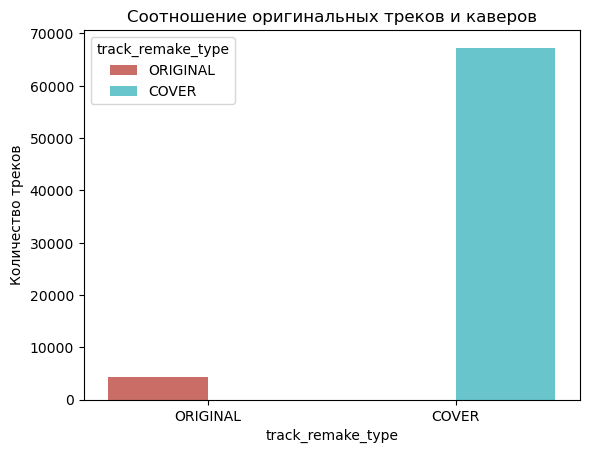

In [9]:
# посмотрим на графике соотношение каверов и некаверов среди треков

countplot = sns.countplot(data=covers_data, x='track_remake_type', palette='hls', hue = 'track_remake_type')
countplot.set_title('Соотношение оригинальных треков и каверов')
countplot.set_ylabel('Количество треков')
plt.show()

In [10]:
# посмотрим распределение уникальных ID оригинальных треков

covers_data['original_track_id'].value_counts().to_frame()

,original_track_id
f3e5e9db509f9b6f6d93b9c38e4e1324,38
17a163f6ab3de102b49599f5577866fc,32
deb9b9598176a0bab1212d430b10bd04,31
53a04991308c2cc9179fdd401fea83a3,30
eeb69a3cb92300456b6a5f4162093851,25
...,...
f90f1b7cdca3bb662457cbfba5bd1e79,1
404ac4ea6ae146e12b7c2e3fd7dc7b3f,1
8f82fd26ef9fee54c9f15b66db50cb86,1
5d6d492e2a0151846b2562ce9e4c8be7,1


In [11]:
# посмотрим на самый распространенный оригинальный трек, который встречается 38 раз

covers_data[covers_data['original_track_id'] == 'f3e5e9db509f9b6f6d93b9c38e4e1324']

,original_track_id,track_id,track_remake_type
211,f3e5e9db509f9b6f6d93b9c38e4e1324,f3e5e9db509f9b6f6d93b9c38e4e1324,ORIGINAL
243,f3e5e9db509f9b6f6d93b9c38e4e1324,9e20fd52b21566494b8d6586a39033c9,COVER
558,f3e5e9db509f9b6f6d93b9c38e4e1324,d71bd79936e69ffeb21ef6dd62e55b2e,COVER
2952,f3e5e9db509f9b6f6d93b9c38e4e1324,1dca7297005a6f9700e9eb43dd47a5e3,COVER
3907,f3e5e9db509f9b6f6d93b9c38e4e1324,214c5086fd618bc642260433c867f9c7,COVER
4385,f3e5e9db509f9b6f6d93b9c38e4e1324,28efa5567f2b3c090f311a3cb8805082,COVER
5828,f3e5e9db509f9b6f6d93b9c38e4e1324,18ad5f6948ce88882bf3791c22a3a53f,COVER
6676,f3e5e9db509f9b6f6d93b9c38e4e1324,ed541e2712a89d14b36170d912ef4698,COVER
7048,f3e5e9db509f9b6f6d93b9c38e4e1324,82aa19859b0f781fceca8b59de6b78ff,COVER
7053,f3e5e9db509f9b6f6d93b9c38e4e1324,04f227ff6ad073b4ac805d753d604337,COVER


Для этого оригинального трека есть 37 каверов.

Заказчик сразу сообщил, что не для каждого кавера известен/существует ID оригинального трека.

### lyrics_data

Посмотрим на несколько текстов в таблице lyrics_data.

In [12]:
lyrics_data['text'][0]

'Живу сейчас обломами, обломками не той любви\nПопытками не то любить, что нужно\nТеряю смысл, ну и пусть, невыносимой стала грусть\nИ в комнате, что с потолком мне чужда\n\nЯ б уплыла в океан, сшила б красный сарафан, и... И...\nЯ б забыла, что ты есть, я б не лезла в эту сеть\nЯ бы, я бы, я бы, я бы не была бы здесь\n\nВолосы пропахли дымом, вечер был довольно длинным...\n\nЖиву сейчас попытками, попытками не пытками\nНайти себя и что-нибудь родное\nИщу я что-то, где-то там, пью чёрный кофе по утрам\nИ не пойму - да что ж это такое?\n\nЯ б уплыла в океан, сшила б красный сарафан, и... И...\nЯ б забыла что ты есть, я б не лезла в эту сеть\nЯ бы, я бы, я бы, я бы не была бы здесь\n\nЯ б уплыла в океан, сшила б красный сарафан, и... И...\nЯ б забыла что ты есть, я б не лезла в эту сеть\nЯ бы, я бы, я бы, я бы не была бы здесь\n\nВолосы пропахли дымом, вечер был довольно длинным...'

In [13]:
lyrics_data['text'][1]

"Tell me your fable\nA fable\nTell me your fable\nTell me your fable\nTell me your fable\nA fable\nTell me your fable\nTalk to me, tenderly\nShow reality, fantasy\nWe'll bound together\nAll win in one feat\nTalk to me, tenderly\nShow reality, fantasy\nWe'll bound together\nAll win in one feat\nThe fable, the fable, ah\nThe fable, the fable\nTell me your fable\nTell me your fable\nA fable, a fable\nA fable that will never end\nAnd now, I dream\nDream, dream"

In [14]:
lyrics_data['text'][267]

'De la mano me cogiste\nY yo te acompañé\nEn mis ojos te perdiste\nYo sin saber qué hacer\nNi me acuerdo de las noches\nQue en vela me quedé\nEscuchando las canciones\nQue de ti me hablaban bien\n\nY en ti puedo ver esas vidas\nQue nunca viví, dulce amiga\nY ya están perdidas\n\nLas coordenadas de tu risa\nMe llevan hacia ti\nY aún me siento esa niña\nQue deja su país\nAlmas viejas nos vigilan\nBailando en un jardín\nY nos gritan las salidas\nHay quien no las quiere oír\n\nY en ti puedo ver esas vidas\nQue nunca viví, dulce amiga\nY ya están perdidas\n\nY al fin descubrí el cielo\nY al fin que se pare el tiempo\nY al fin descubrí el cielo\nY al fin que se pare el tiempo\nLarí, ra-ra-ra, ra-ra-ra-ra\nLarí, ra-ra-ra, ra-ra-ra-ra, ra-ra-ra-ra-ra\nY al fin descubrí el cielo (larí, ra-ra-ra, ra-ra-ra-ra)\nY al fin aceptar el tiempo (larí, ra-ra-ra, ra-ra-ra-ra)'

Тексты выглядят немного короткими (особенно на русском языке), возможно тексты песен приведены не полностью и надо будет искать другие источники полных текстов песен.

В признаке `track_id` 10277 уникальных значений из 11414. Наиболее частое *b891000882f4a612190142861b5c038b* встречается 24 раза. При этом признаки `text` и `lyricId` также имеют разное количество уникальных значений. `text` 10644 из 11414, а `lyricId` 10915 из 11414. Это говорит о том, что во всех этих столбцах имеются дубликаты.

In [15]:
# частота уникальных значений track_id

lyrics_data['track_id'].value_counts().to_frame()

,track_id
b891000882f4a612190142861b5c038b,24
adc126c946551da4e1784e716b77992e,17
f0f429d03fdd19f08ff60e889e32aae2,16
951edd96627f47b783716a54d2368d7b,12
ca1c4cbc9b1cb3197ed5e52df9caf573,12
...,...
f4d64771c9859a7c24c9fd4e513b0173,1
044c9caa72f85c15f0e4cde5d1906957,1
1baad2f02b10ae48aa0457386ef7c3fe,1
32436073f567a7afd699bb9261c89b51,1


In [16]:
# посмотрим подробнее на самый часто упоминающийся track_id  = 'b891000882f4a612190142861b5c038b'

lyrics_data[lyrics_data['track_id'] == 'b891000882f4a612190142861b5c038b']

,lyricId,text,track_id
1800,6510c50bec7a64a02a3a198793d81f2b,The night I laid my eyes on you\nFelt everythi...,b891000882f4a612190142861b5c038b
1814,5de2a48ffe755a226704bb6db2f1b743,The night I laid my eyes on you\nFelt everythi...,b891000882f4a612190142861b5c038b
3360,89d690b2da9a4827cfd9f1fa088ec207,"La, la, la, la, la, la, la, la, la, la, la, la...",b891000882f4a612190142861b5c038b
5304,1a6450a439b4d385b40f3077d308e01a,The night I laid my eyes on you\nFelt everythi...,b891000882f4a612190142861b5c038b
6007,3aa4b1682c24f8ce982245856da157d6,The night I laid my eyes on you\nFelt everythi...,b891000882f4a612190142861b5c038b
6175,5fdc9a316a05bca8a5d6b1d5da453659,The night I laid my eyes on you\nFelt everythi...,b891000882f4a612190142861b5c038b
6535,66183e0ff8df93904f9f67b63e6980d9,The night I laid my eyes on you\nFelt everythi...,b891000882f4a612190142861b5c038b
7595,11ba6102483116158e814fcc7bbdc55e,The night I laid my eyes on you\nFelt everythi...,b891000882f4a612190142861b5c038b
7601,504c9590913941d22dd49124f63d4d5e,La lalala lala lalala lala\nLa lalala lala lal...,b891000882f4a612190142861b5c038b
7602,913ae25eda32c1b63d180562d65fade2,La lalala lala lalala lala\nLa lalala lala lal...,b891000882f4a612190142861b5c038b


In [17]:
# посмотрим, например, на текст песни с индексом 7595

lyrics_data['text'][7595]

"The night I laid my eyes on you\nFelt everything around me move\nGot nervous when you looked my way\nBut you knew all the words to say\n\nThen your love slowly moved right in\nAll this time oh my love where've you been\n\nMi amore don't you know\nMy love I want you so\nSugar you make my soul complete\nRapture tastes so sweet\n\nI'm mesmerized in every way\nYou keep me in a state of daze\nYou're kisses make my skin feel weak\nI'm always melting in your heat\n\nThen I soar like a bird in the wind\nOh I glide as I'm flying through heaven\n\nMi amore don't you know\nMy love I want you so\nSugar you make my soul complete\nRapture tastes so sweet\n\nSince we connect behind closed doors\nSpark this fire even more\nNo telling where we will be next\nSurrender to your rapture arrest\nLay your head, let the slumber float\nCan't resist, that's why words were wrote\n\nMi amore don't you know\nMy love I want you so\nSugar you make my soul complete\nRapture tastes so sweet"

In [18]:
# и на текст песни с индексом 7601

lyrics_data['text'][7601]

"La lalala lala lalala lala\nLa lalala lala lalala lala\n\nThe night I laid my eyes on you,\nFelt everything around me move\nGot nervous when you looked my way\nBut you knew all the words to say.\n\nThen your love slowly moved right in\nAll this time all my love where you been.\n\nMe, amore don't you know\nMy love I want you so\nSugar you make my soul complete\nRapture tastes so sweet.\n\nMesmerised in every way\nKeep me in a state of daze\nYour kisses make my skin feel weak\nAlways melting in your heat.\n\nThen I soar like a bird in the wind\nOh I glide as I'm flying through heaven.\n\nMe, amore don't you know\nMy love I want you so\nSugar you make my soul complete\nRapture tastes so sweet.\n\nMe, amore dont you know\nMy love I want you so\nSugar you make my soul complete\nRapture tastes so sweet\n\nLa lalala lala lalala lala\nLa lalala lala lalala lala\n\nMe, amore don't you know\nMy love I want you so\nSugar you make my soul complete\nRapture tastes so sweet.\n\nMe, amore don't you 

Во втором случае в начале песни добавлены слова la la la, а также они же периодически повторяются в течение всей песни. И таких отличий между текстами песен одного `track_id` довольно много. При этом все они имеют разный `lyricId` из-за разных комбинаций и количества la la la. В других треках тексты могут отличаться только знаками препинания.
Заказчик объясняет это тем, что для каждого трека могло быть несколько источников текстов, а также ошибками (дублированием) при загрузке данных.

При обработке текстов некоторые слова, частицы, союзы, знаки препинания и пр.будут удалены, поэтому для одного уникального `track_id` можно взять любой текст (`lyricId`).

### meta_data

In [19]:
# переведем столбец dttm в формат даты 

meta_data['dttm'] = pd.to_datetime(meta_data['dttm'], unit='ms')

In [20]:
meta_data.head()

,track_id,dttm,title,language,isrc,genres,duration
0,c3b9d6a354ca008aa4518329aaa21380,2021-12-16 21:00:00,Happy New Year,EN,RUB422103970,[DANCE],161120.0
1,c57e3d13bbbf5322584a7e92e6f1f7ff,2021-11-24 14:00:33,Bad Habits,EN,QZN882178276,[ELECTRONICS],362260.0
2,955f2aafe8717908c140bf122ba4172d,2021-11-24 15:37:03,Por Esa Loca Vanidad,None,QZNJZ2122549,"[FOLK, LATINFOLK]",260000.0
3,fae5a077c9956045955dde02143bd8ff,2021-11-24 15:37:03,Mil Lagrimas,None,QZNJZ2166033,"[FOLK, LATINFOLK]",190000.0
4,6bede082154d34fc18d9a6744bc95bf5,2021-11-24 15:37:03,Sexo Humo y Alcohol,None,QZNJZ2122551,"[FOLK, LATINFOLK]",203000.0


In [21]:
# посмотрим крайние даты появления информации о треках

print(meta_data['dttm'].min())
print(meta_data['dttm'].max())

2009-08-10 17:32:06
2023-10-18 21:00:00


В пояснении от Заказчика сказано, что в их базе было две даты неясного происхождения. То, что отгружено для данного исследования - минимальная из этих двух дат. По мнению Заказчика, это скорее дата релиза, но могут быть аномалии. По возможности точные даты релизов надо будет собрать в других источниках.

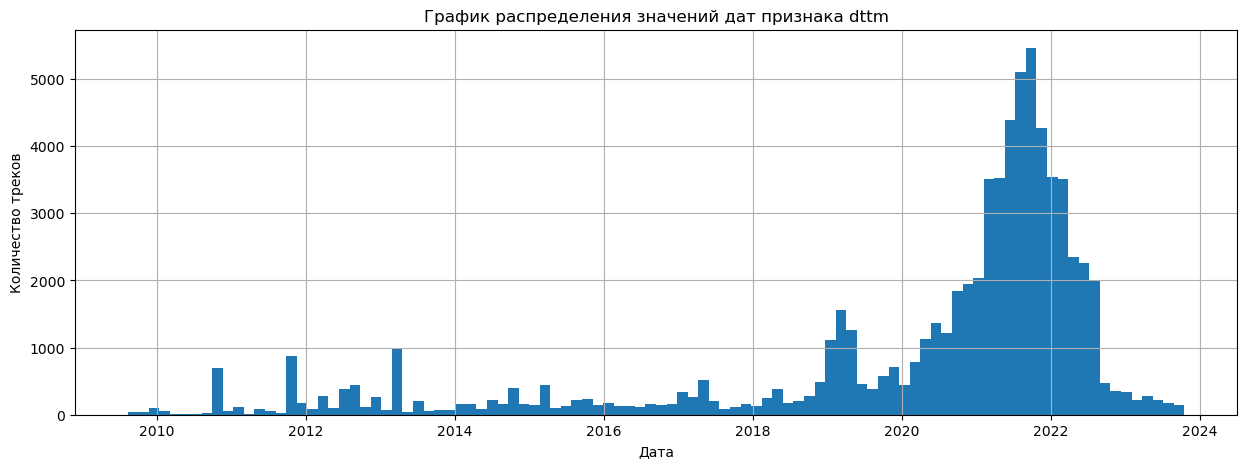

In [22]:
# посмотрим на графике распределение значений признака dttm

meta_data['dttm'].hist(figsize=(15,5), bins=100)
plt.title('График распределения значений дат признака dttm')
plt.ylabel('Количество треков')
plt.xlabel('Дата');

Основная масса треков либо имеет год выхода либо подгружена в базу с 2020 по 2023 год.

In [23]:
# посчитаем дубликаты в признаке title

meta_data['title'].duplicated().sum()

26306

In [24]:
meta_data[meta_data.duplicated(subset=['title'])]

,track_id,dttm,title,language,isrc,genres,duration
30,40033dd2d1f3a83379694f31fb1fd138,2021-11-24 17:59:44,Coração Cachorro,None,QZNJZ2173624,"[FOLK, LATINFOLK]",161260.0
38,48d51c4f95e5f5b84459ac46267606cf,2021-11-24 18:04:25,Baby Me Atende,None,QZNJZ2173796,"[FOLK, LATINFOLK]",230360.0
56,68e7add90b1ab25f93a18eb28e51fbde,2021-11-24 20:02:35,Baby Me Atende,None,QZNJZ2175508,"[FOLK, LATINFOLK]",243250.0
61,80b173d446e4dc31a262872aa0906b18,2021-11-24 20:02:35,Volta Rapariga,None,QZNJZ2175513,"[FOLK, LATINFOLK]",196050.0
297,305a85530f916f3ebd801702c2dd967f,2021-11-29 16:01:32,Revoada no Colchão,None,QZNJZ2196119,"[FOLK, LATINFOLK]",165000.0
...,...,...,...,...,...,...,...
71761,86f1aff8c191baf6957fcda82fe6b3c3,2019-06-18 21:00:00,Diamonds,None,ES50A1900470,"[ELECTRONICS, HOUSE]",281980.0
71762,495babc700c0c6b5b8549d49f163d3cb,2021-07-03 21:00:00,Stay With Me,EN,GBKPL1955058,"[JAZZ, VOCALJAZZ]",152090.0
71763,496e3bddf448fbedab6a0825382618c4,2019-06-13 04:18:06,Se Preparó,None,FR2X41997633,"[FOLK, LATINFOLK]",186340.0
71766,26b6aca1c6a02ad0e2a939164716657e,2019-06-13 17:50:02,Vacation,EN,USA2B1511447,[ALTERNATIVE],215210.0


Названия треков повторяются: это могут быть как оригиналы и их каверы, так и просто одинаковые названия разных песен разных исполнителей.

In [25]:
# посмотрим на распределение языков исполнения

meta_data['language'].value_counts().to_frame()

,language
EN,15322
ES,1747
RU,1558
IT,907
HI,285
...,...
BM,1
TN,1
AB,1
NY,1


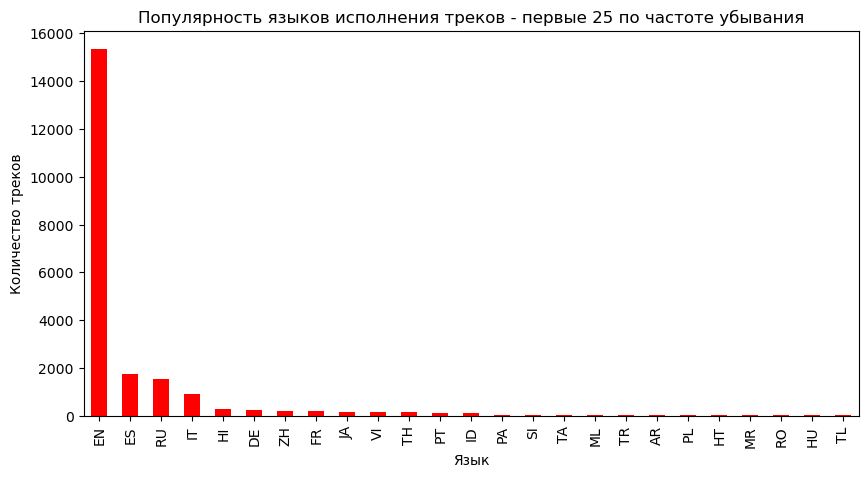

In [26]:
# посмотрим на графике распределение первых 25 языков исполнения треков в порядке убывания

meta_data['language'].value_counts(ascending=False).head(25).plot(kind='bar', figsize=(10,5), x='language', color='r')
plt.xlabel('Язык')
plt.ylabel('Количество треков')
plt.title('Популярность языков исполнения треков - первые 25 по частоте убывания');

In [27]:
# уникальные языки исполнения

meta_data['language'].unique()

array(['EN', None, 'ES', 'HI', 'DE', 'RU', 'TR', 'HU', 'TH', 'PL', 'FR',
       'NY', 'AF', 'AS', 'UZ', 'HT', 'EL', 'AZ', 'IT', 'PA', 'PT', 'TA',
       'JA', 'ML', 'VI', 'ID', 'LA', 'CS', 'SI', 'UK', 'OR', 'HR', 'AR',
       'KK', 'FI', 'IE', 'ZH', 'AB', 'KN', 'FA', 'BN', 'TL', 'SK', 'KS',
       'SV', 'RO', 'TN', 'KO', 'MS', 'BM', 'HY', 'TW', 'MY', 'CA', 'NL',
       'ET', 'TE', 'MN', 'HE', 'SQ', 'IG', 'MR', 'BE', 'LT', 'UR', 'IA',
       'GN', 'SW', 'NO', 'GU', 'KY', 'KU', 'IS', 'TG', 'SR', 'DA', 'LO',
       'LV', 'SE', 'WO', 'SA', 'YO', 'ST', 'HA', 'AV', 'IU'], dtype=object)

Всего представлены 85 языков исполнения. Самый распространенный - английский - на нем исполняется подавляющее число композиций (более 15 000). Далее со значительным отставанием (менее 2 000) следуют испанский и русский язык. На остальных языках исполняется менее, чем по 1000 треков. В этом признаке содержится около 70% пропусков. Необходимо либо восполнять данные, либо возможно отказываться от этого признака в пользу новых из других источников.

In [28]:
# посмотрим на распределение м/н уникальных идентификаторов трека

meta_data['isrc'].value_counts().to_frame()

,isrc
USTCF1018560,3
USTCF1017794,3
FR33T0819525,3
FR59R2297788,2
QZNC62100408,2
...,...
QZHZ52133544,1
QZHN92184835,1
QZHZ52129987,1
QZMHN2006080,1


In [29]:
# взглянем на повторяющийся isrc

meta_data[meta_data['isrc'] == 'USTCF1018560']

,track_id,dttm,title,language,isrc,genres,duration
42673,9ca51834e2b6a7266ebcb10cf9a00409,2014-09-23 12:08:24,How Far We've Come,None,USTCF1018560,"[ROCK, ALLROCK]",200820.0
66195,6aca118f8f2851a808eaafcb3d3cda53,2018-03-27 21:38:54,How Far We've Come,None,USTCF1018560,"[ROCK, ALLROCK]",178960.0
67313,cb367ef7a2e579583fc3262dcf900e4e,2018-11-08 18:31:51,How Far We’ve Come (2009),EN,USTCF1018560,"[ROCK, ALLROCK]",178920.0


In [30]:
# взглянем на повторяющийся isrc

meta_data[meta_data['isrc'] == 'USTCF1017794']

,track_id,dttm,title,language,isrc,genres,duration
42711,e5f88a9ed9ba5ef0e3cb530277566ba1,2014-09-23 12:08:40,Before It's Too Late,None,USTCF1017794,"[ROCK, ALLROCK]",189570.0
66194,7e2743a13b9bff53dc00b98ed4a5d900,2018-03-27 21:38:54,Before It’s Too Late,None,USTCF1017794,"[ROCK, ALLROCK]",189570.0
67273,2c2d1b38bbf162e62e4118bf224d8292,2018-11-08 18:31:51,Before It’s Too Late (2007),EN,USTCF1017794,"[ROCK, ALLROCK]",189530.0


In [31]:
# взглянем на повторяющийся isrc

meta_data[meta_data['isrc'] == 'FR33T0819525']

,track_id,dttm,title,language,isrc,genres,duration
45314,1401678df4f9b4c51275bbd5b3402075,2013-09-30 20:00:00,Societas Satanas,EN,FR33T0819525,"[METAL, BLACKMETAL]",230250.0
69911,d5715b7753eaf70fd674032456e8225c,2019-03-13 07:23:28,Societas Satanas,EN,FR33T0819525,"[METAL, BLACKMETAL]",230250.0
70278,4776f168e2201dfd32d6e00add694c42,2019-04-02 04:50:40,Societas Satanas,None,FR33T0819525,"[METAL, BLACKMETAL]",0.0


Всего 71283 уникальных международных идентификаторов трека. В Википедии написано, что различные записи, редакции и ремиксы одной и той же песни будут иметь различные коды isrc. Следовательно, имеющиеся повторы isrc говорят об аномалии. Треки с одним isrc имеют разные даты dttm (дату релиза или дату загрузки в базу?), разную длительность, для некоторых не указан язык исполнения. На стадии предобработки данных для baseline модели возможно будет лучше удалить дубли, оставив один из них с наиболее полной информацией.

In [32]:
# посмотрим какие жанры присущи трекам

pd.set_option('display.max_rows', None)
meta_data['genres'].value_counts().to_frame()

,genres
"[FOLK, LATINFOLK]",18391
[POP],13157
"[ROCK, ALLROCK]",5898
[ALTERNATIVE],3570
[FOLK],2645
[],2352
[ELECTRONICS],2231
[SOUNDTRACK],2181
[DANCE],2166
[SPIRITUAL],1552


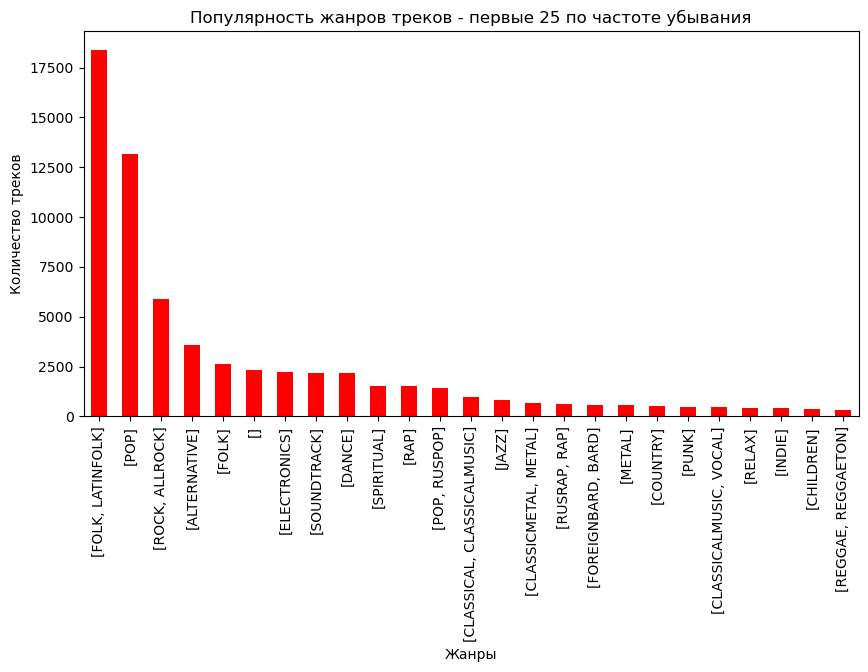

In [33]:
# посмотрим на графике распределение первых 25 жанров треков в порядке убывания

meta_data['genres'].value_counts(ascending=False).head(25).plot(kind='bar', figsize=(10,5), x='genres', color='r')
plt.xlabel('Жанры')
plt.ylabel('Количество треков')
plt.title('Популярность жанров треков - первые 25 по частоте убывания');

В жанрах замечены некоторые "странности": пустой список - 2352 композиции, CHILDREN - 387, FORCHILDREN - 80, FAIRYTALES - 52, FORCHILDREN, LULLABY - 2. Жанр пустого списка не определен, жанры для детей могут содержать специфичные треки детских песен, колыбельных, детских аудиокниг.

In [34]:
# посмотрим крайнюю (мин/макс) длительность треков

print(meta_data['duration'].min())
print(meta_data['duration'].max())

0.0
5487300.0


Присутствуют композиции с нулевой длительностью, 0.5% от всех данных, от них скорее всего надо будет избавляться. Значение 5487300.0 (более 91 минуты) аномально большое.

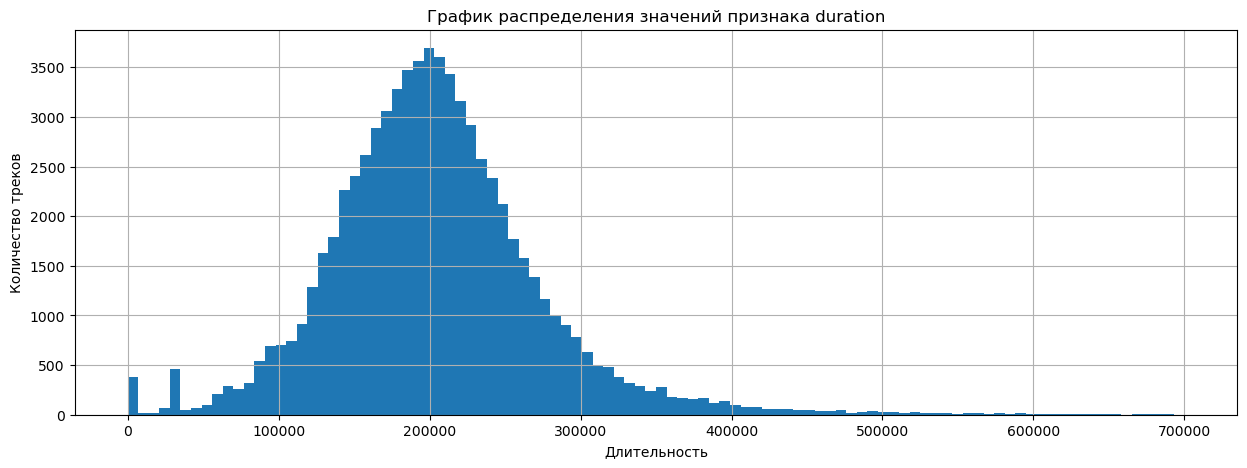

In [35]:
# посмотрим на графике распределение значений признака duration

meta_data['duration'].hist(figsize=(15,5), bins=100, range=(0,700000))
plt.title('График распределения значений признака duration')
plt.ylabel('Количество треков')
plt.xlabel('Длительность');

Распределение очень похоже на нормальное - близлежащие статистики это подтверждают -  медиана 199395 и среднее 204919; у нормального распределения 95% всех значений лежат на расстоянии не более двух стандартных отклонений и 99,7 % не более трёх. На графике визуально длительность менее 100000мс и более 300000мс кажется аномальной.

<div style='border:solid green 3px; padding: 40px'>

**Результаты ИАД:**

Данные состоят из трех файлов, полученных от Заказчика:

- файл **`covers.json`** — содержит разметку каверов, сделанную редакторами сервиса:
 - original_track_id - уникальный идентификатор исходного трека (состоит из букв латинского алфавита и цифр);
 - track_id - уникальный идентификатор трека (состоит из букв латинского алфавита и цифр);
 - track_remake_type - метка, присвоенная редакторами (может принимать 2 значения: ORIGINAL и COVER).
    
- файл **`lyrics.json`** - содержит тексты песен и уникальные идентификаторы текста:
 - lyricId - уникальный идентификатор текста (состоит из букв латинского алфавита и цифр);
 - text - текст трека на соответствующем языке;
 - track_id - уникальный идентификатор трека (состоит из букв латинского алфавита и цифр).

- файл **`meta.json`** — содержит метаинформацию о треке:
 - track_id - уникальный идентификатор трека (состоит из букв латинского алфавита и цифр);
 - dttm - первая дата появления информации о треке;
 - title - название трека;
 - language - язык исполнения;
 - isrc - международный уникальный идентификатор трека (состоит из 5 букв латинского алфавита и 7 цифр);
 - genres - жанры;
 - duration - длительность трека.

Во всех файлах столбец `track_id` содержит уникальный идентификатор трека. Это внутренний идентификатор трека в компании Заказчика. Данные представлены числовыми, категориальными и текстовыми значениями с типами данных object и float64. Явные дубликаты (полностью идентичные строки) в датафреймах отсутствуют.
    
 
В таблице **covers_data** 71597 строк. 
    
Столбец `original_track_id` имеет 93% пропусков (от всего объема данных), т.к. не для всех каверов известны идентификаторы исходных треков. Всего в таблице 4468 уникальных оригинальных треков. Для самого часто встречающегося (38 раз) оригинального id трека есть сам трек плюс 37 его каверов.
    
Признак `track_remake_type` может принимать 2 значения: ORIGINAL и COVER. Наиболее часто встречающееся значение COVER (67304 раза).

В таблице **lyrics_data** 11414 строк, пропуски и нулевые значения отсутствуют. 
    
В результате выборочного изучения тексты выглядят немного короткими (особенно на русском языке), возможно тексты песен приведены не полностью и надо будет искать другие источники полных текстов песен. Также для одного `track_id` может быть много `lyricId`, где тексты незначительно отличаются несколькими словами и/или знаками препинания. Для одного из треков имеется аж 24 "уникальных" текста. Заказчик объясняет эту аномалию тем, что для каждого трека могло быть несколько источников текстов, а также ошибками (дублированием) при загрузке данных. При обработке и векторизации текстов для baseline модели для каждого `track_id` можно будет взять любой из его текстов. Количество уникальных значений каждого признака меньше общего количества строк, что говорит о наличии дубликатов значений в каждом из столбцов.
    
В таблице **meta_data** 71769 строк. 

В столбце `track_id` имеется 1 пропуск.
    
Дата в столбце `dttm` представлена типом данных float64, в результате обработки преобразована в дату типа datetime. В этом столбце также 1 пропуск. Самая ранняя дата - 2009-08-10 17:32:06, самая поздняя - 2023-10-18 21:00:00. По мнению Заказчика, это скорее дата релиза трека, но могут быть аномалии. Если эти даты и можно будет использовать для построения baseline модели, то в дальнейшем с большой вероятностью надо будет собирать данные о годах выпуска треков, т.к. это может значительно помочь в определении оригинала музыкальной композиции и её каверов. 
    
В столбце `title` 1 пропуск и 45462 уникальных названия. Самое распространенное Morena, повторяется 81 раз. Всего в этом признаке 26306 дубликатов. Это могут быть как оригиналы и их каверы, так и просто одинаковые названия разных песен разных исполнителей.
    
В столбце `language` представлено 85 языков исполнения. Самый распространенный - EN английский - на нем исполняется подавляющее число композиций (15 322 раза). Далее со значительным отставанием следуют испанский (1747 раз) и русский язык (1558 раз). На остальных языках исполняется менее, чем по 1000 треков. В этом признаке содержится около 70% пропусков. Необходимо либо восполнять данные, либо возможно отказываться от этого признака в пользу новых из других источников.
    
Код ISRC в столбце `isrc` состоит из 12 символов и записывается в формате «CC-XXX-YY-NNNNN» (дефисы не являются частью кода ISRC, но этот код часто пишут таким образом, чтобы облегчить его чтение), где:
 - «CC» означает код страны согласно ISO 3166-1 alpha-2
 - «XXX» — трёхзначный алфавитно-цифровой регистрационный код, уникальным образом определяющий организацию, которая регистрирует код. Например, в Великобритании это Phonographic Performance Limited (PPL).
 - «YY» — последние две цифры года регистрации (не обязательно соответствуют году, когда произведена запись)
 - «NNNNN» — уникальная последовательность из пяти цифр, определяющая определённую аудиозапись.   

ISRC - международный стандартный код для точного определения уникальной аудио- или видеозаписи (а не песни в целом). Различные записи, редакции и ремиксы одной и той же песни будут иметь различные коды ISRC. Так как в данных есть несколько повторяющихся isrc, следовательно, имеющиеся повторы isrc говорят об аномалии. Треки с одним isrc имеют разные даты dttm (дату релиза или дату загрузки в базу?), разную длительность, для некоторых не указан язык исполнения. На стадии предобработки данных для baseline модели возможно будет лучше удалить дубли, оставив один из них с наиболее полной информацией. В столбце `isrc` 314 пропусков (менее 0.5% от всех данных). Их тоже можно будет удалить для построения baseline модели. 
Скорее всего именно этот код музыкальных треков поможет собрать данные из других источников.
    
В столбце `genres` 232 уникальных наименования жанра (который может состоять из одного или списка из нескольких жанров). Самый распространенный - список из двух жанров [FOLK, LATINFOLK] - повторяется 18391 раз. Затем [POP] - 13157 раз, затем [ROCK, ALLROCK] - 5898 раз. Имеется 1 пропуск. Также имеется жанр в виде пустого списка у 2352 композиций.
    
Столбец `duration` - длительность композиции в милисекундах - представлен в формате float64. Имеет 369 нулевых значений (0.5% от всех данных) и 1 пропуск. Три четверти всех значений лежат в промежутке от 1.613700e+05 (около 2,7 мин) до 2.390700 (около 4 мин.). Аномалии в процессе предобработки можно будет удалить.

## Предобработка данных (Data preprocessing)

### covers_data preprocessing

In [36]:
# заполним пропуски в столбце original_track_id на значение unknown

covers_data_change = covers_data.copy()
covers_data_change['original_track_id'] = covers_data_change['original_track_id'].fillna(value='unknown')

### lyrics_data preprocessing

В этой таблице встречаются уникальные track_id, для которых есть много lyricId и text. Обработаем такие строки.

In [37]:
# оставим для каждого track_id первый соответствующий ему lyricId и text и переименуем столбцы

lyrics_data_change = lyrics_data.copy().groupby('track_id', as_index=False).agg({'lyricId': 'first',
                                                                   'text': 'first'}).\
                                     rename(columns={'lyricId': 'first_lyricId',
                                                     'text':'first_text'})


In [38]:
# проверим, что получилось

lyrics_data_change.head()

,track_id,first_lyricId,first_text
0,0000757a652c12554a82002cd90cc10a,344613f3596f8e9ee7ac2a6e92133a58,दिल क्यूँ ये मेरा शोर करे?\nदिल क्यूँ ये मेरा ...
1,00017038a565df4b72048268e7623599,fa545be436bdaaab85286b8e5d37749f,Se que nada pasara\nSi mañana no me ves\nY ten...
2,000801d33025623d7de5b42f40b37ddf,dc889a9db5ff11d5bc752dd3f0e8f3fb,"Секунду назад было нежно и тихо\nЛетали, шепта..."
3,0014e3765c38c9f86fa57e5c40ff8910,6556b4fc349dceff23118fdc99f39e97,Just a small town girl\nLivin' in a lonely wor...
4,0016ea67c5fd2d71eee4b8c583d3a6b7,8bffc092ba71ae5fddadff5328f5ed00,On a dark desert highway\nCool wind in my hair...


In [39]:
lyrics_data_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10277 entries, 0 to 10276
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       10277 non-null  object
 1   first_lyricId  10277 non-null  object
 2   first_text     10277 non-null  object
dtypes: object(3)
memory usage: 241.0+ KB


### meta_data preprocessing

В этой таблице нужно обработать строки с пропусками и аномалиями.

In [40]:
# из анализа помним, что в этой таблице была строка со всеми пропусками

meta_data[meta_data['track_id'].isna()]

,track_id,dttm,title,language,isrc,genres,duration
44434,None,NaT,None,None,None,None,NaN


In [41]:
# удалим эту строку

meta_data_change = meta_data.copy().drop(index=44434)

Даты `dttm` и названия песен `title` оставим как есть, пропусков там нет.

В столбце `language`, чтобы не потерять данные, пропуски заполним значением unknown.

In [42]:
# заполним пропуски в столбце language на значение unknown

meta_data_change['language'] = meta_data_change['language'].fillna(value='unknown')

Посмотрим что там с пропусками в столбце isrc - их там осталось 313 (менее 0.5% от данных в этой таблице).

In [43]:
# строки с пропусками в признаке isrc

meta_data_change[meta_data_change['isrc'].isna()]

,track_id,dttm,title,language,isrc,genres,duration
2151,16645e5e127d29b8bbbea6375a9344e2,2021-12-23 21:00:00,Глава 4. Урок рисования,unknown,None,[FAIRYTALES],559040.0
2185,96f75d124808c84d823f09add1b6855c,2021-12-23 09:05:46,Чижик-пыжик (А. Пинегин — А. Усачев),unknown,None,[FORCHILDREN],144560.0
2238,77bf68f7657ba9f87ee6ae7af3dc8999,2021-12-23 15:13:33,Повторение счёта до 12,unknown,None,[FORCHILDREN],97720.0
2317,fb97e639240fb249756b40e0f88387cb,2021-12-24 08:21:48,Глава 12. Пятно,unknown,None,[FAIRYTALES],103280.0
3838,be76b11b186c8f8a6afb34a23f64b132,2022-01-20 11:55:03,Americano,unknown,None,[],225800.0
3839,57592bb19732a5b36568b96dd077b9fd,2022-01-20 11:59:27,Снег идет,unknown,None,[],279560.0
4820,d241ca50664a10dbca4cf57a3c984cbe,2022-02-03 21:00:00,Круги на воде,unknown,None,"[RUSESTRADA, ESTRADA]",212820.0
8197,4ed5eabe40d2148c57e111c0b8903800,2022-03-23 07:10:36,Он тебя не любил,unknown,None,[],200380.0
9443,b4c2d3184013a5c459081829a090b6d8,2022-04-25 06:20:52,Bir kecha mehmoning bo'lay,unknown,None,"[POP, UZBEKPOP]",170810.0
9444,1a8bf8401636061cf2ca2a07565db7d3,2022-04-25 06:20:52,Dido anam dido,unknown,None,"[POP, UZBEKPOP]",212500.0


В основном, это детские жанры (аудиокниги), стихи на русском, композиции жанров [ ], [POP, UZBEKPOP], [POP, RUSPOP], [POP], [RUSRAP, RAP]. Удалим эти строки.

In [44]:
# удалим строки с пропусками в столбце isrc

meta_data_change = meta_data_change.dropna(subset=['isrc'])

Удалим аномалии в столбце duration, опираясь на его близкое к нормальному распределению значений.

In [45]:
# посмотрим значения квантилей на интервале 0.01 - 0.99 % значений

print(meta_data_change['duration'].quantile(0.01))
print(meta_data_change['duration'].quantile(0.99))

29675.4
443646.8000000005


In [46]:
meta_data_change.query('duration <= 29675.4').count()

track_id    715
dttm        715
title       715
language    715
isrc        715
genres      715
duration    715
dtype: int64

In [47]:
meta_data_change.query('duration >= 443646.8').count()

track_id    715
dttm        715
title       715
language    715
isrc        715
genres      715
duration    715
dtype: int64

In [48]:
# сохраним таблицу в интервале 0.01-0.99% значений duration

meta_data_change = meta_data_change.loc[(meta_data_change['duration'] > 29675.4) & (meta_data_change['duration'] < 443646.8)]

In [49]:
# проверим, что осталось

meta_data_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70025 entries, 0 to 71768
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   track_id  70025 non-null  object        
 1   dttm      70025 non-null  datetime64[ns]
 2   title     70025 non-null  object        
 3   language  70025 non-null  object        
 4   isrc      70025 non-null  object        
 5   genres    70025 non-null  object        
 6   duration  70025 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 4.3+ MB


In [50]:
# напишем функцию для преобразования списка жанров в строчные значения

def join_str(row):
    join_spisok = ' '.join(row['genres'])
    return join_spisok

In [51]:
# преобразуем столбец genres из списочных значений в строчные

meta_data_change['genres'] = meta_data_change.apply(join_str, axis=1)

In [52]:
meta_data_change.head()

,track_id,dttm,title,language,isrc,genres,duration
0,c3b9d6a354ca008aa4518329aaa21380,2021-12-16 21:00:00,Happy New Year,EN,RUB422103970,DANCE,161120.0
1,c57e3d13bbbf5322584a7e92e6f1f7ff,2021-11-24 14:00:33,Bad Habits,EN,QZN882178276,ELECTRONICS,362260.0
2,955f2aafe8717908c140bf122ba4172d,2021-11-24 15:37:03,Por Esa Loca Vanidad,unknown,QZNJZ2122549,FOLK LATINFOLK,260000.0
3,fae5a077c9956045955dde02143bd8ff,2021-11-24 15:37:03,Mil Lagrimas,unknown,QZNJZ2166033,FOLK LATINFOLK,190000.0
4,6bede082154d34fc18d9a6744bc95bf5,2021-11-24 15:37:03,Sexo Humo y Alcohol,unknown,QZNJZ2122551,FOLK LATINFOLK,203000.0


In [53]:
meta_data_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70025 entries, 0 to 71768
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   track_id  70025 non-null  object        
 1   dttm      70025 non-null  datetime64[ns]
 2   title     70025 non-null  object        
 3   language  70025 non-null  object        
 4   isrc      70025 non-null  object        
 5   genres    70025 non-null  object        
 6   duration  70025 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 4.3+ MB


### Объединение данных в одну талицу (Data merging)

Объединим таблицы по полю track_id и типом соединения inner - это соединит строки, имеющиеся одновременно в обеих таблицах, и отбросит информацию о треках, которые есть, например, только в одной из таблиц.

In [54]:
# соединим данные в одну таблицу по track_id

data = covers_data_change.merge(meta_data_change, how='inner', on='track_id').\
                                merge(lyrics_data_change, how='inner', on='track_id')

data.head()

,original_track_id,track_id,track_remake_type,dttm,title,language,isrc,genres,duration,first_lyricId,first_text
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL,2009-11-11 21:00:00,Proud Mary,EN,USFI86900049,ROCK ALLROCK,187220.0,260f21d9f48e8de874a6e844159ddf28,Left a good job in the city\nWorkin' for the m...
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL,2009-11-11 21:00:00,Fortunate Son,EN,USFI86900065,ROCK ALLROCK,137780.0,2498827bd11eca5846270487e4960080,Some folks are born made to wave the flag\nOoh...
2,cd89fef7ffdd490db800357f47722b20,cd89fef7ffdd490db800357f47722b20,ORIGINAL,2009-09-21 20:00:00,La Camisa Negra,ES,USUL10400965,POP FOLK LATINFOLK,216840.0,5237001311d4062bf2b80de30652bf58,"Uno por pobre y feo, hombre\nPero antoja'o, ay..."
3,995665640dc319973d3173a74a03860c,995665640dc319973d3173a74a03860c,ORIGINAL,2009-11-16 21:00:00,The Way I Are,EN,USUM70722806,FOREIGNRAP RAP,179660.0,e5b1b57090b728e8d98d2b4d9b781bf4,"Yeah!... yeah!... remember the time, baby... y..."
4,unknown,4da9d7b6d119db4d2d564a2197798380,COVER,2009-09-17 20:00:00,Can't Buy Me Love,EN,USGR10110569,JAZZ VOCALJAZZ,158950.0,58b6145f2fb180f8cdc2067b4f1baebd,Can't buy me love\nCan't buy me love\nCan't bu...


In [55]:
# переименуем названия столбцов в первоначальные

data.rename(columns = {'first_lyricId': 'lyricId', 'first_text': 'text'}, inplace = True )

In [56]:
# проверим, что получилось

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9960
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_track_id  9961 non-null   object        
 1   track_id           9961 non-null   object        
 2   track_remake_type  9961 non-null   object        
 3   dttm               9961 non-null   datetime64[ns]
 4   title              9961 non-null   object        
 5   language           9961 non-null   object        
 6   isrc               9961 non-null   object        
 7   genres             9961 non-null   object        
 8   duration           9961 non-null   float64       
 9   lyricId            9961 non-null   object        
 10  text               9961 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 933.8+ KB


Всего получилось данных с текстами 9961 строка.

In [57]:
# посмотрим как распределился целевой признак

data['track_remake_type'].value_counts()

COVER       7287
ORIGINAL    2674
Name: track_remake_type, dtype: int64

По сравнению с начальными данными количество оригиналов песен уменьшилось примерно в 2 раза, а каверов в 9.5 раз.

In [58]:
# посмотрим как распределились языки исполнения

data['language'].value_counts()

EN         4406
unknown    3736
RU         1130
ES          268
IT           62
HI           50
FR           46
JA           36
ID           31
DE           31
TH           28
VI           26
PT           20
ZH           10
AR            7
PA            7
UK            7
HU            5
RO            5
PL            5
TR            4
SV            4
TL            3
SI            3
ML            3
EL            2
TA            2
SW            2
DA            2
AS            2
HE            2
ET            1
LA            1
AZ            1
AF            1
IE            1
UZ            1
MS            1
NO            1
SK            1
IA            1
TE            1
SQ            1
HA            1
KN            1
NL            1
SR            1
Name: language, dtype: int64

In [59]:
data['language'].unique()

array(['EN', 'ES', 'unknown', 'RU', 'PT', 'PL', 'FR', 'TH', 'DE', 'IT',
       'HI', 'SV', 'AR', 'JA', 'TR', 'NL', 'HU', 'DA', 'SW', 'TA', 'RO',
       'UK', 'KN', 'VI', 'EL', 'ML', 'HA', 'SQ', 'TL', 'NO', 'PA', 'ID',
       'ZH', 'TE', 'HE', 'SI', 'IA', 'SK', 'ET', 'MS', 'UZ', 'AS', 'AZ',
       'LA', 'AF', 'IE', 'SR'], dtype=object)

Осталось 46 языков и неопределенный язык с заглушкой unknown. Самым распространенным так и остался английский. Затем песни на неуказанном языке исполнения, затем на русском и испанском.

In [60]:
data[data['language'] == 'JA']

,original_track_id,track_id,track_remake_type,dttm,title,language,isrc,genres,duration,lyricId,text
2325,unknown,54525c81abb07bea36f6a18bc83a0e6b,COVER,2015-12-16 02:59:44,Brick,JA,JPJ901011440,FOLK,245000.0,907420590541e3bc3cb6fd9aa2e450db,"6 a.m., day after Christmas\nI throw some clot..."
3136,unknown,c0994d93540d1bae15cf1c60ef53ca44,COVER,2017-10-13 09:52:49,Lie Iel Iel,JA,JPJ901706820,ROCK ALLROCK,117960.0,9228cf3f687dc6184cb6d67f5126c56e,うそそうそう うそそうそう うそそうそう\nうそそうそう うそそうそう うそそうそう\nうそ...
3137,unknown,0b0cb418312abd55220023ee83d91314,COVER,2017-10-13 09:52:49,My Brain Is Short Cake [We Love Shigeru],JA,JPJ901706830,ROCK ALLROCK,333190.0,05e848734c3c5006d036840dfe4b43ef,脳みそショートケーキ 召し上がれ\nあなたのお口の周り あたし脳足りん クリームくりん\nつ...
3175,unknown,b565319aa5f7d4e763edae5edb44c3a6,COVER,2017-11-28 21:00:00,Cobalt Memories,JA,JPPO01706342,SOUNDTRACK ANIMEMUSIC,266760.0,4c6ad171ce70d3808b14ae1ab1ed3d9d,海岸線は半透明\nカモメが鳴いた\nノイズまみれのラジオが歌うよ\n結構前の話\n世界が全員...
3395,unknown,8f9df6c6ca8191d071cb1cd26be24e16,COVER,2018-07-03 21:00:00,Boku No Sobani,JA,JPPO01802080,POP JAPANESEPOP,315970.0,70051a8430ea3fb9733ce3863526afb9,今慰める言葉より\n君の寂しげな顔が...\n遠くに映る夕日の中で\nこの胸を閉ざしてしまう...
3630,unknown,53ac78864e53d2571493ba21726ec3c6,COVER,2018-11-26 21:00:00,Hanamizuki,JA,JPPO01805265,POP JAPANESEPOP,320560.0,4fc895d79975f810d3dae7c4e25cecf0,空を押し上げて\n手を伸ばす君 五月のこと\nどうか来てほしい\n水際まで来てほしい\nつぼ...
3808,unknown,0017395e7a7953bd7a4acf4ef237f30a,COVER,2019-01-21 08:41:14,Kiseki,JA,JPU901803361,POP JAPANESEPOP,297680.0,1523993d4661a95479312e6f1f6469a0,青く小さな心\n隠した手のひらの隙間に\n光が射すようにそっと\n優しく伝わる温もり\n迷い...
3809,unknown,176a201be1f248a084280b35dcb17236,COVER,2019-01-21 09:40:39,Freesia,JA,JPU901802753,POP JAPANESEPOP,336370.0,abbff1e877f12cadee5d6c061b29d532,漂う宇宙のどこか遠く\n祈り通ずる惑星があるとしたら\n僕らはそこへ向かうだろうか\nそして...
4245,unknown,044a7a072a300395a8107b8d92027f3f,COVER,2019-08-15 21:00:00,Kizunami,JA,JPWP01900939,ELECTRONICS,260940.0,bca85fa05a40a084327185ecf32cbc63,ちゃちゃ ちゃらら ちゃちゃ ちゃららら\nちゃちゃら ちゃらちゃら ちゃら ちゃちゃ\nち...
4272,unknown,12814e5cb952486f4c07081d9f90b9a6,COVER,2019-08-26 07:38:54,remember,JA,JPU901901430,POP JAPANESEPOP,348370.0,6fb1ed0e522db6fa5744f0a95529c095,夏の終わりを知らせるように\n道端にそっと 並んで咲いた\n夕にも染まらず風も知らない\n青...


###  Преобразование и отбор признаков для построения бэйзлайн модели

Попробуем сделать преобразование и обучение модели на фрагменте данных в 1000 строк.

In [61]:
# сделаем копию датасета и возьмем из него 1000 строк

data_fragment = data.copy().head(1000)

In [62]:
# посмотрим как распределились метки классов

data_fragment['track_remake_type'].value_counts()

COVER       829
ORIGINAL    171
Name: track_remake_type, dtype: int64

In [63]:
# посмотрим как распределились языки

data_fragment['language'].value_counts()

EN         704
unknown    273
ES          10
RU           4
TH           3
PL           2
FR           2
PT           1
DE           1
Name: language, dtype: int64

In [64]:
# приведем все слова в столбцах title, genres, text к нижнему регистру

data_fragment['title'] = data_fragment['title'].str.lower()
data_fragment['genres'] = data_fragment['genres'].str.lower()
data_fragment['text'] = data_fragment['text'].str.lower()

In [65]:
data_fragment.head(2)

,original_track_id,track_id,track_remake_type,dttm,title,language,isrc,genres,duration,lyricId,text
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL,2009-11-11 21:00:00,proud mary,EN,USFI86900049,rock allrock,187220.0,260f21d9f48e8de874a6e844159ddf28,left a good job in the city\nworkin' for the m...
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL,2009-11-11 21:00:00,fortunate son,EN,USFI86900065,rock allrock,137780.0,2498827bd11eca5846270487e4960080,some folks are born made to wave the flag\nooh...


In [66]:
# напишем функцию, очищающую текст от лишних знаков и цифр

def clear_text(text):
    return " ".join(re.sub(r'[.,"\'-?:!;]', ' ', text).split())

In [67]:
# очистим все тексты от знаков препинания

data_fragment['title'] = data_fragment['title'].apply(clear_text)
data_fragment['text'] = data_fragment['text'].apply(clear_text)

In [68]:
data_fragment.head(2)

,original_track_id,track_id,track_remake_type,dttm,title,language,isrc,genres,duration,lyricId,text
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL,2009-11-11 21:00:00,proud mary,EN,USFI86900049,rock allrock,187220.0,260f21d9f48e8de874a6e844159ddf28,left a good job in the city workin for the man...
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL,2009-11-11 21:00:00,fortunate son,EN,USFI86900065,rock allrock,137780.0,2498827bd11eca5846270487e4960080,some folks are born made to wave the flag ooh ...


In [69]:
data_fragment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_track_id  1000 non-null   object        
 1   track_id           1000 non-null   object        
 2   track_remake_type  1000 non-null   object        
 3   dttm               1000 non-null   datetime64[ns]
 4   title              1000 non-null   object        
 5   language           1000 non-null   object        
 6   isrc               1000 non-null   object        
 7   genres             1000 non-null   object        
 8   duration           1000 non-null   float64       
 9   lyricId            1000 non-null   object        
 10  text               1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 93.8+ KB


In [70]:
# напишем функцию, разделяющую текст на слова и лемматизирующую их

def lemmatize(text):
    wnl = WordNetLemmatizer()
    words = text.split()
    lemm_list = []
    for word in words:
        lemm_list.append(wnl.lemmatize(word))
    return ' '.join(lemm_list)

In [71]:
# лемматизируем тексты

data_fragment['text'] = data_fragment['text'].apply(lemmatize)

In [72]:
# проверим, что получилось

data_fragment.head(2)

,original_track_id,track_id,track_remake_type,dttm,title,language,isrc,genres,duration,lyricId,text
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL,2009-11-11 21:00:00,proud mary,EN,USFI86900049,rock allrock,187220.0,260f21d9f48e8de874a6e844159ddf28,left a good job in the city workin for the man...
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL,2009-11-11 21:00:00,fortunate son,EN,USFI86900065,rock allrock,137780.0,2498827bd11eca5846270487e4960080,some folk are born made to wave the flag ooh t...


In [73]:
data_fragment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_track_id  1000 non-null   object        
 1   track_id           1000 non-null   object        
 2   track_remake_type  1000 non-null   object        
 3   dttm               1000 non-null   datetime64[ns]
 4   title              1000 non-null   object        
 5   language           1000 non-null   object        
 6   isrc               1000 non-null   object        
 7   genres             1000 non-null   object        
 8   duration           1000 non-null   float64       
 9   lyricId            1000 non-null   object        
 10  text               1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 93.8+ KB


### Деление данных на выборки, выделение признаков и целевого признака (Data splitting, features/target splitting)

In [74]:
# скопируем необходимые столбцы

data_final = data_fragment.copy()[['track_remake_type', 'duration', 'text']]

In [75]:
data_final.head(2)

,track_remake_type,duration,text
0,ORIGINAL,187220.0,left a good job in the city workin for the man...
1,ORIGINAL,137780.0,some folk are born made to wave the flag ooh t...


In [76]:
# разделим данные на две выборки с учетом дисбаланса классов целевого признака

train, test = train_test_split(data_final, test_size=0.25, 
                                         random_state=random_state, stratify=data_final['track_remake_type'])

In [77]:
# посмотрим размер выборок

print(train.shape)
print(test.shape)

(750, 3)
(250, 3)


In [78]:
# выделим обучающие признаки

feat_train = train.drop(['track_remake_type'], axis=1)
feat_test = test.drop(['track_remake_type'], axis=1)

In [79]:
# выделим целевой признак

target_train = train['track_remake_type']
target_test = test['track_remake_type']

### Векторизация столбца text

In [80]:
# создадим счётчик TF-IDF

count_tf_idf = TfidfVectorizer(stop_words=list(eng_stopwords))

In [81]:
# английские стоп-слова из библиотеки nltk

eng_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [82]:
# чтобы посчитать TF-IDF для обучающей выборки

tf_idf_train = count_tf_idf.fit_transform(feat_train['text'])

In [83]:
print(tf_idf_train[0])

  (0, 6292)	0.03245225940821426
  (0, 4752)	0.05044560797885638
  (0, 2421)	0.036140412254851415
  (0, 4202)	0.055419650975365733
  (0, 6593)	0.040680792764316166
  (0, 3110)	0.03352014023962034
  (0, 2968)	0.028465416042998813
  (0, 5966)	0.048211845460246656
  (0, 5410)	0.0442846955218757
  (0, 3465)	0.06158056343234641
  (0, 5431)	0.055419650975365733
  (0, 3620)	0.05160391630186735
  (0, 6523)	0.055419650975365733
  (0, 2777)	0.02482588871731221
  (0, 3253)	0.06158056343234641
  (0, 4608)	0.04309782606140438
  (0, 5819)	0.05044560797885638
  (0, 1048)	0.055419650975365733
  (0, 2827)	0.06330193560737914
  (0, 6356)	0.03091597754977595
  (0, 2403)	0.026898590106911306
  (0, 2600)	0.05797666067478687
  (0, 7275)	0.06158056343234641
  (0, 163)	0.027745737279261024
  (0, 2774)	0.026633247481701355
  :	:
  (0, 6685)	0.05343628016532212
  (0, 6233)	0.05797666067478687
  (0, 1195)	0.05797666067478687
  (0, 7789)	0.03639806269624156
  (0, 7141)	0.03878247827654489
  (0, 2337)	0.03473406700

In [84]:
# применим счетчик TF-IDF для тестовой выборки

tf_idf_test = count_tf_idf.transform(feat_test['text']) 

In [85]:
# посмотрим на размеры матриц признаков обучающей и тестовой выборок

print("Размер матрицы:", tf_idf_train.shape)
print("Размер матрицы:", tf_idf_test.shape)

Размер матрицы: (750, 8869)
Размер матрицы: (250, 8869)


### Обучение модели градиентного бустинга LGBMClassifier()

In [86]:
# инициируем модель LightGBM

lgbm_model = LGBMClassifier()

In [87]:
# обучим модель LightGBM

lgbm_model.fit(tf_idf_train, target_train)

[LightGBM] [Info] Number of positive: 128, number of negative: 622
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7783
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 388
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170667 -> initscore=-1.580910
[LightGBM] [Info] Start training from score -1.580910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier()

In [89]:
# посмотрим результат работы модели на тестовой выборке

predictions_lgbm = lgbm_model.predict(tf_idf_test)
lgbm_acc = accuracy_score(target_test, predictions_lgbm)
print(f'Accuracy модели LGBMClassifier на тестовой выборке: {lgbm_acc:.3f}')

Accuracy модели LGBMClassifier на тестовой выборке: 0.824


In [90]:
# посмотрим результат работы модели на тестовой выборке

lgbm_report = classification_report(target_test, predictions_lgbm)
print(f'Classification_report модели LGBMClassifier на тестовой выборке:')
print(lgbm_report)

Classification_report модели LGBMClassifier на тестовой выборке:
              precision    recall  f1-score   support

       COVER       0.84      0.97      0.90       207
    ORIGINAL       0.45      0.12      0.19        43

    accuracy                           0.82       250
   macro avg       0.65      0.54      0.54       250
weighted avg       0.77      0.82      0.78       250

